In [165]:
import cv2
import numpy as np
import os
import matplotlib.image as mping
import matplotlib.pyplot as plt

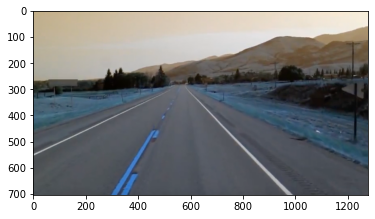

In [282]:
lane_image = cv2.imread('sample1.jpeg')
plt.imshow(lane_image)

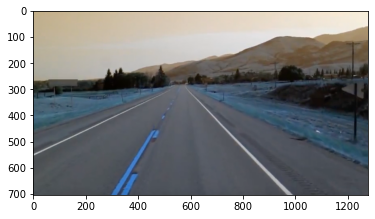

In [281]:
plt.imshow(lane_image)

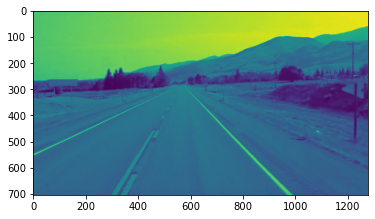

In [168]:
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

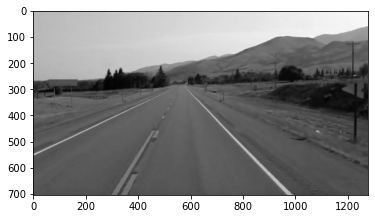

In [169]:
plt.imshow(gray, 'gray')

image consists of noise and hence we have to remove it. it can be done by blurring the image so that false edges can be avoided to be detected

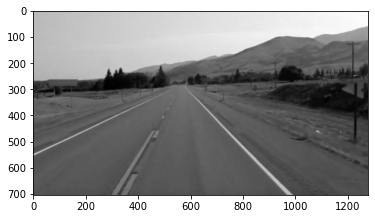

In [170]:
blur = cv2.GaussianBlur(gray, (3,3), 0) #5,5 is the kernel and must be odd 
plt.imshow(blur, 'gray')            #change in kernel leads to chanf=ge in intensity of blur

 edge is a region in an image where there is a sharp change in intensity or sharp change in the color between an adjacent pixel in the image.

For this, at every pixel, the pixel is checked if it is a local maximum in its neighborhood. This step is called Non-Maximum Suppression.
canny = cv2.Canny(image, low_threshold, upper_threshold)
low_threshold and upper_thresholddetermine how strong the edge must be to be detected.

 canny = cv2.Canny(image, low_threshold, upper_threshold)

Recommended low to high threshold ration is 1:2 or 1:3

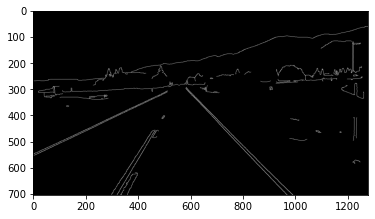

In [171]:
cannyImage = cv2.Canny(blur, 50, 150)
plt.imshow(cannyImage, 'gray') 

in form of function putting all this together 

In [172]:
image = cv2.imread('sample1.jpeg')
def CannyEdge(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    cannyImage = cv2.Canny(blur, 60, 180)
    return cannyImage

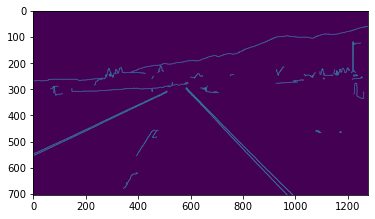

In [173]:
plt.imshow(CannyEdge(image))

In [174]:
image.shape  #(height, width,number of channels )
#How many numbers we have per pixel is the number of channels that image has(RGB). 

(704, 1279, 3)

specifying region of interest

for triangle mark coordinates in x,y form
first left bottom then apex then bottom right

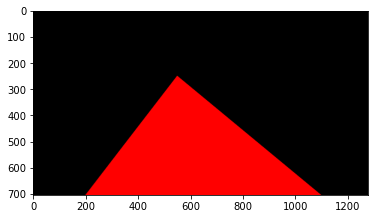

In [175]:
def region_of_interest(image):
    
    height = image.shape[0]
    triangle = np.array([[(200, height),(550, 250),(1100, height),]], np.int32)
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, triangle, 255)
    return mask
plt.imshow(region_of_interest(image))

 zeros_like creates an array of zeros with the same shape as the image.
 
 
 Meaning that both mask and row are going to have the same number of rows and columns. Although the mask is going to be completely black because it only contains zeros. We now need to fill our mask with the triangle we just defined which contains the vertices for the field of view. We use OpenCV’s fillPoly function in order to fill the polygon on the mask. The third parameter in fillPoly is color of polygon.

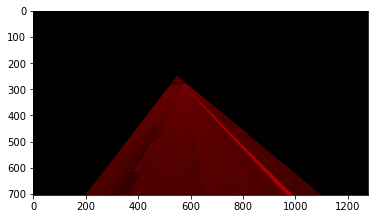

In [176]:
def region_of_interest(image):
    height = image.shape[0]
    triangle = np.array([[(200, height),(550, 250),(1100, height),]], np.int32)
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, triangle, 255)
    masked_image = cv2.bitwise_and(image, mask) #AND operation being performed on the image and mask to combine the output
    return masked_image
plt.imshow(region_of_interest(image))

Hough Transform  x*cos + y*sin

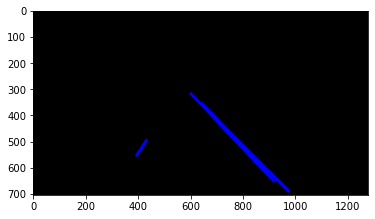

In [177]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 10)
    return line_image
cropped_Image = region_of_interest(CannyEdge(image))
rho = 2
theta = np.pi/180
threshold = 100
lines = cv2.HoughLinesP(cropped_Image,rho, theta, threshold, np.array ([]), minLineLength=40, maxLineGap=5)
line_image = display_lines(lane_image, lines)
plt.imshow(line_image)

to display this output on our original image    is used


addWeighted function = (image1, alpha, image2, beta, gamma)

Image= alpha * image1 + beta * image2 + y

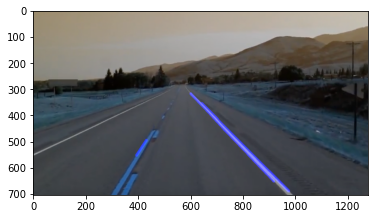

In [178]:
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 0)
plt.imshow(combo_image)

Part 2

image rotation

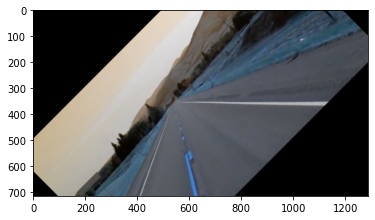

In [179]:
image = cv2.imread('sample1.jpeg')

#axis of rotation
height, width = image.shape[:2]
center = (width/2,height/2)

#rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center=center,angle=45,scale=1)

#rotating the image
rotated_image = cv2.warpAffine(src=image,M = rotation_matrix,dsize = (width+10,height+10))
plt.imshow(rotated_image)                                    #change the dsize to fit the image better

image translation

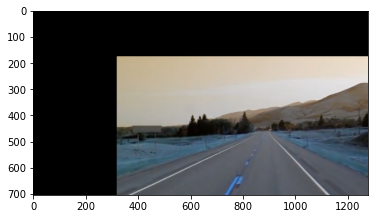

In [180]:
image = cv2.imread('sample1.jpeg')
height, width = image.shape[:2]

#translation parameters
tx,ty = width/4,height/4

#create translation matrix
translation_matrix = np.array([
    [1,0,tx],
    [0,1,ty]
],dtype=np.float32)

translated_image = cv2.warpAffine(src=image,M=translation_matrix,dsize=(width,height))
plt.imshow(translated_image)


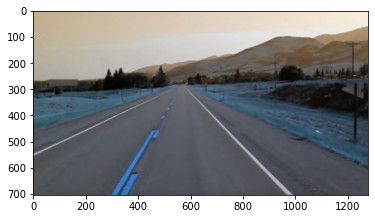

In [181]:
#gaussian blur
image = cv2.imread('sample1.jpeg')

gaussian_image = cv2.GaussianBlur(image,(3,3),cv2.BORDER_DEFAULT)
#other blur methods
#gaussian_image = cv2.blur(image,(3,3),cv2.BORDER_DEFAULT)
plt.imshow(gaussian_image)

sharpen image

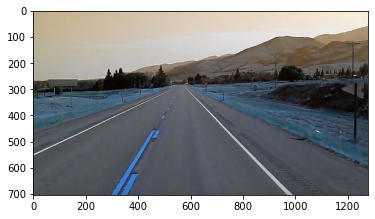

In [182]:
image = cv2.imread('sample1.jpeg')

#sharpen filter
filter = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

#kernel
kernel = np.array([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
])

result_image = cv2.filter2D(image,-1,kernel)  #filter2D used to alter the image
sharpening = cv2.filter2D(image,-1,filter)
plt.imshow(sharpening)

part 2

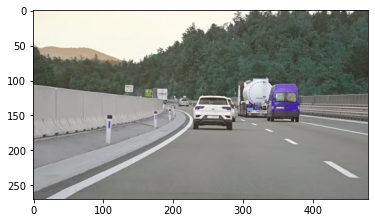

In [183]:
image = cv2.imread('dashboard-point-view.webp')
plt.imshow(image)

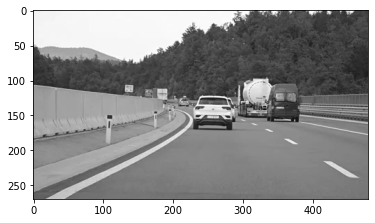

In [184]:
image = cv2.imread('dashboard-point-view.webp')
gray_scale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_scale,'gray')

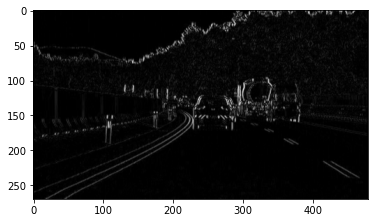

In [185]:
#calculating gradients
sobelx = cv2.Sobel(gray_scale,cv2.CV_64F,1,0,ksize = 3)
#CV_64F is the channel for gray image
# 1,0 represents image is wrt x
sobelx = np.absolute(sobelx)
plt.imshow(sobelx,cmap = 'gray')

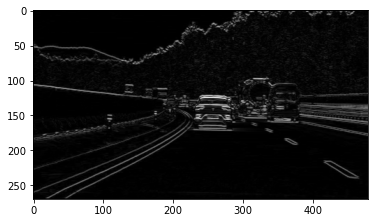

In [186]:
#calculating gradients
sobely = cv2.Sobel(gray_scale,cv2.CV_64F,0,1,ksize = 3)
#CV_64F is the single channel for gray image
# 0,1 represents image is wrt y
sobely = np.absolute(sobely)
plt.imshow(sobely,cmap = 'gray')

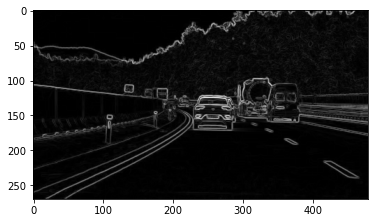

In [187]:
Gradient = np.sqrt(sobelx**2+sobely**2)
plt.imshow(Gradient,cmap = 'gray')

we need to scale the gradient so as to convert it to 8bit format between the range 0 and 255

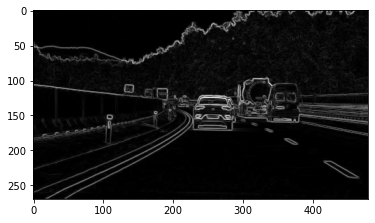

In [188]:
Gradient_scaled = np.max(Gradient)/255 #scaling factor
Gradient_mapped = (Gradient/Gradient_scaled).astype(np.uint8)
plt.imshow(Gradient_mapped,cmap = 'gray')

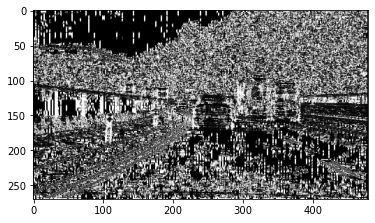

In [189]:
#direction of gradient
arc = np.arctan2(sobelx,sobely) #change wrt to x
plt.imshow(arc,cmap = 'gray')

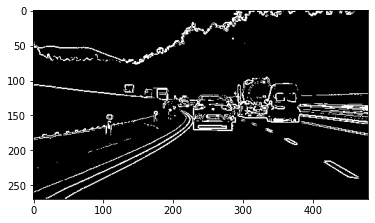

In [190]:
#double thresholding
Image_dt = np.zeros_like(Gradient_mapped)
Image_dt[(Gradient_mapped>=55)&(Gradient_mapped<=160)] = 1
               #lower        and  upper threshold
plt.imshow(Image_dt,cmap = 'gray')

Lane Detection

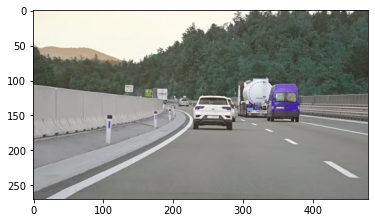

In [191]:
Image = cv2.imread('dashboard-point-view.webp')
plt.imshow(Image)

color thresholding

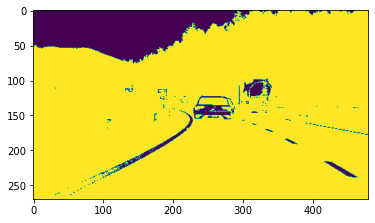

In [192]:
#image size
ysize = Image.shape[0]
xsize = Image.shape[1]
color_limits = np.copy(Image) #copying the image data in a variable

#white color selection values
Red_limit = 210
Green_limit = 210
Blue_limit = 210

rgb_limits = [Red_limit,Green_limit,Blue_limit]

#limiting the values in order to focus on the region of interest
color_limits = (Image[:,:,0]<rgb_limits[0]) | (Image[:,:,0]<rgb_limits[1]) | (Image[:,:,0]<rgb_limits[2])
                      #red                           green                         blue
plt.imshow(color_limits)

In [193]:
Image.shape

(270, 480, 3)

Region thresholding

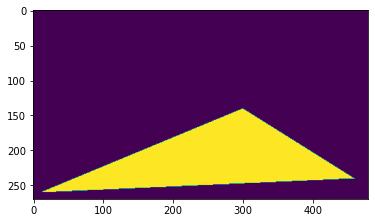

In [206]:
region_thresholds = np.copy(Image)
color_select = np.copy(Image)
line_image = np.copy(Image)

#triangular section limits
left_bottom = [10,260]
right_bottom = [460,240]
top = [300,140]

#linear fit
fit_left = np.polyfit((left_bottom[0],top[0]),(left_bottom[1],top[1]),1) #1 written in end to represent a linear line
fit_right = np.polyfit((right_bottom[0],top[0]),(right_bottom[1],top[1]),1)
fit_bottom = np.polyfit((left_bottom[0],right_bottom[0]),(left_bottom[1],right_bottom[1]),1)
       #polyfit used to fit a line
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0,ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & (YY > (XX*fit_right[0] + fit_right[1])) & (YY < (XX*fit_bottom[0] + fit_bottom[1]))



plt.imshow(region_thresholds)

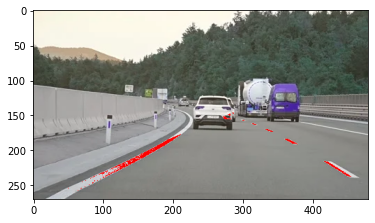

In [207]:
#mask color and region
color_select[color_limits | ~region_thresholds] = [0,0,0]
#color pixels where both region of interest and image meet
line_image[~color_limits & region_thresholds] = [255,0,0]
plt.imshow(line_image)

In [209]:
fit_left # array is [slope , y intercept]

array([ -0.4137931 , 264.13793103])

Hough transform for lane detection

(270, 480, 3)

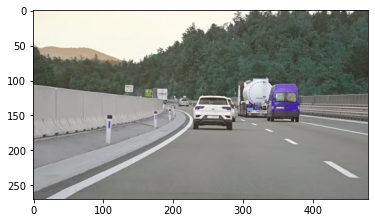

In [210]:
Image = cv2.imread('dashboard-point-view.webp')
plt.imshow(Image)
Image.shape

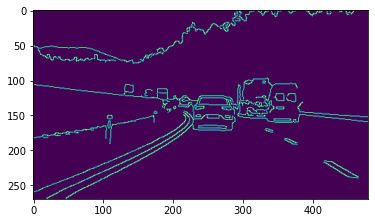

In [246]:
Image = (Image*255).astype(np.uint8) #image will be in form of 8-bit
gray = cv2.cvtColor(Image,cv2.COLOR_RGB2GRAY )

#Blurring the image 
kernel_size  = 5 #the amount of blur,more kernel size = more blur ,always odd number
blur_gray = cv2.GaussianBlur(gray,(kernel_size,kernel_size),0)

#canny edge
low_theshold = 100
high_theshold = 200
edges = cv2.Canny(blur_gray,low_theshold,high_theshold)

plt.imshow(edges) # canny image

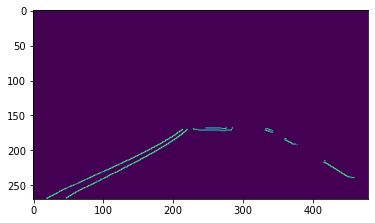

In [247]:
mask = np.zeros_like(edges) #empty variable 
ignore_mask_color = 255

#region of interest
imshape = Image.shape
vertices = np.array([[(10,270),(210,170),(330,165),(470,245)]],dtype = np.int32)
                #left bottom , top left , top right , bottom right


cv2.fillPoly(mask,vertices,ignore_mask_color)
masked_edges = cv2.bitwise_and(edges,mask)
plt.imshow(masked_edges)

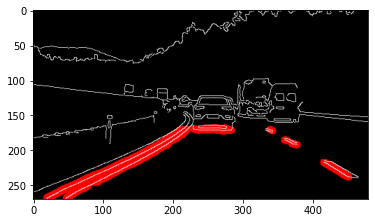

In [245]:
line_iamge = np.copy(Image)*0
#Hough Transform
rho = 1 #distance resolution of accumulator in pixels
theta = np.pi/180 #angle resolution of accumulator in radians
threshold = 2 #those lines returned which are b/w a specific threshold
min_line_length = 4 #min. angle to check for lines
max_line_gap = 5   #max angle
lines = cv2.HoughLinesP(masked_edges,rho,theta,threshold,np.array([]),min_line_length,max_line_gap)
                         #parameters for hough transform
for line in lines:
    for x1,y1,x2,y2 in line: #from this we are storing and drawing on the masked_edges lines(above cropped image) in a variable
        cv2.line(line_iamge,(x1,y1),(x2,y2),(255,0,0),10)
#plt.imshow(lines)
color_edges = np.dstack((edges,edges,edges)) # np.dstack used to Stack arrays in sequence depth wise(increasing order)
  #color_edges is a color binary image
lines_edges = cv2.addWeighted(color_edges,0.8,line_iamge,1,0)
plt.imshow(lines_edges)

hsv color can be used to adjust the lighting of the image

hue = color type

saturation = higher saturation means higher the value of the hue color

value = will represent the amount of lighting

HSV Color

Text(0.5, 1.0, 'RGB and HSV edge detection')

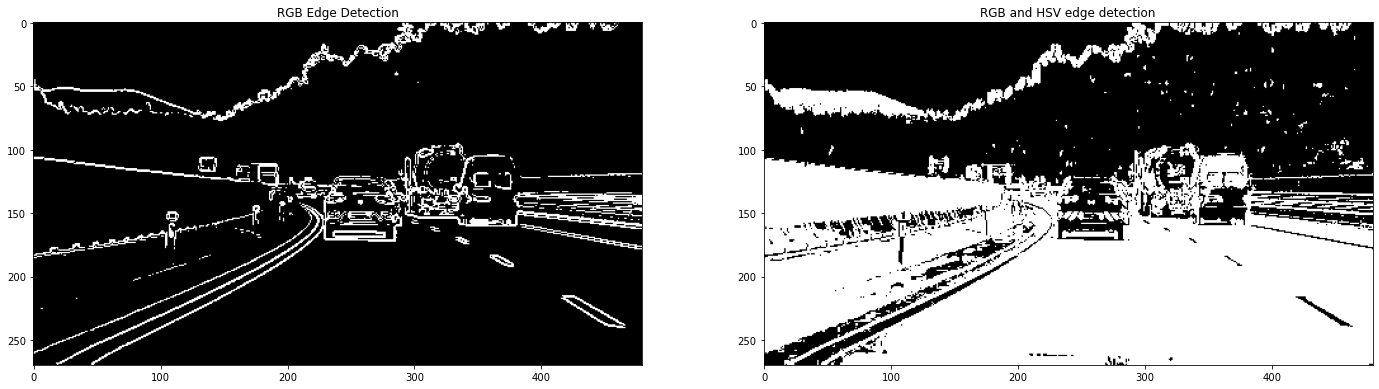

In [311]:
Image = mping.imread('dashboard-point-view.webp')
gray_scale = cv2.cvtColor(Image,cv2.COLOR_RGB2GRAY)

sobelx = cv2.Sobel(gray_scale,cv2.CV_64F,1,0,ksize = 7) 
abs_sobelx = np.absolute(sobelx)

#to scale the model  #scaled 0-255
scale_model = np.uint8(255*abs_sobelx/np.max(abs_sobelx)) 

#threshold the data margin
sx_binary = np.zeros_like(scale_model)  #enhancing the margins of the image in order to visualize it in a better way
sx_binary[(scale_model >=30) & (scale_model <=200)] = 1

#threshold the data white
white_binary = np.zeros_like(gray_scale) 
white_binary[(gray_scale >= 120) & (gray_scale <=180)] = 1  #the gray_image having values between these two limits will be converted to white color

#convert to HSV 
HSV = cv2.cvtColor(Image,cv2.COLOR_RGB2HSV) #RGB TO HSV
H = HSV[:,:,0] 
S = HSV[:,:,1]

sat_binary = np.zeros_like(S)
sat_binary[(S > 80) & (S <= 120)] = 1
HUE_binary = np.zeros_like(H)
HUE_binary[(H > 20) & (H <= 30)] = 1

#combine
binary_1 = cv2.bitwise_or(sx_binary, white_binary) #or is used so as to save the greater of the two inputs
binary_2 = cv2.bitwise_or(HUE_binary,sat_binary)
binary = cv2.bitwise_or(binary_1,binary_2)

#plt.imshow(HUE_binary,cmap='gray')
f,(ax1,ax2) = plt.subplots(1,2,figsize =(24,9) )
ax1.imshow(Image_dt,cmap = 'gray')
ax1.set_title('RGB Edge Detection')
ax2.imshow(binary,cmap = 'gray')
ax2.set_title('RGB and HSV edge detection')

code to obtain following values

mtx = camera matrix

dist = distortion calibration value

rvecs = amount of rotation

tvecs = amount of translation

In [319]:
#number of checkboards
nx = 13
ny = 9
objectpoints = []
imagepoints = []

objp = np.zeros((9*13,3),np.float32)
objp[:,:2] = np.mgrid[0:13,0:9].T.reshape(-1,2)

#import images
cal_images_list = os.listdir("Camera_Calibration_Images/")

for image_name in cal_images_list:
    import_image = 'Camera_Calibration_Images/'+image_name
    image = cv2.imread(import_image)
    
   
   #convert to gray scale
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    
     #identifying corners
    ret,corners = cv2.findChessboardCorners(gray,(nx,ny),None)
    #print(ret)
    
    if ret == True:
        #iog =  cv2.drawChessboardCorners(image,(nx,ny),corners,ret)
        imagepoints.append(corners)
        objectpoints.append(objp)
        #cv2.imshow('img',iog)
        #cv2.waitKey(10)
        #cv2.destroyAllWindows()
        ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objectpoints,imagepoints,gray.shape[::-1],None,None)

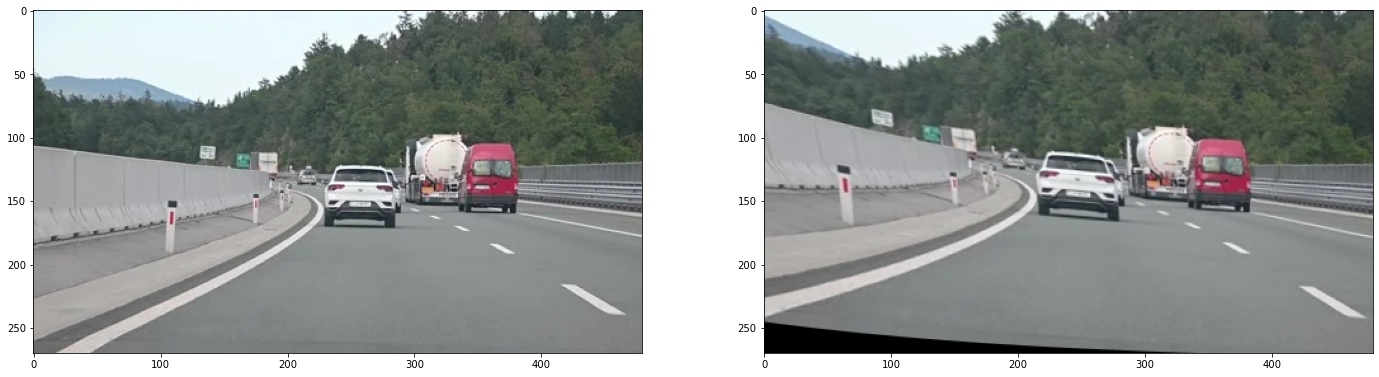

In [321]:
#to find undistorted image
image = cv2.imread('dashboard-point-view.webp')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
undistorted_image = cv2.undistort(image,mtx,dist,None,mtx)


f,(ax1,ax2) = plt.subplots(1,2, figsize = (24,9))
ax1.imshow(image) 
ax2.imshow(undistorted_image)

Perspective Transform

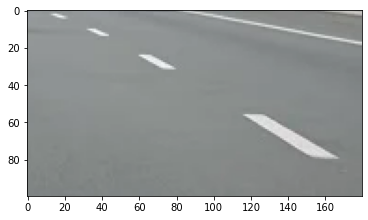

In [324]:
croppped_image = image[160:260,300:480] #height,width
plt.imshow(croppped_image)

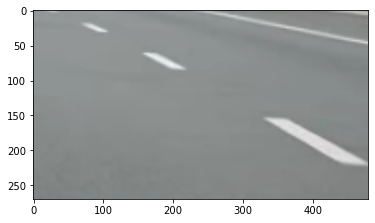

In [326]:
def perspective_transform(image):
    image_size = (image.shape[1],image.shape[0])
    offset = 500

    src = np.float32([  #src = source points 
       (480,260), #bottom right (x,y) form
       (480,160),  #top right
       (300,160),   #top left
       (300,260)    #bottom left
    ])         #points taken in anti-clockwise manner from the bottom right point
 
    dst =  np.float32([  #dst= destination points
      [offset,image_size[1]],
      [offset, 0],
      [image_size[0]-offset,0],
      [image_size[0]-offset,image_size[1]]
    ])

    M = cv2.getPerspectiveTransform(src, dst)
    M_inv = cv2.getPerspectiveTransform(dst,src)
    warped = cv2.warpPerspective(image, M, image_size)
    return warped,M_inv
warped, M_inv =perspective_transform(undistorted_image)
plt.imshow(warped)

Thresholding to detect lanes

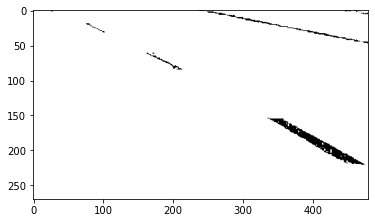

In [375]:
def Thresholding(image):
    gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

    #apply sobel
    sobelx = cv2.Sobel(gray_image,cv2.CV_64F,1,0)
    abs_sobelx = np.absolute(sobelx)

    #scaled 0-255
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    #threshold the data margin
    sx_binary = np.zeros_like(scaled_sobel) #enhancing the margins of the image in order to visualize it in a better way
    sx_binary[(scaled_sobel >=30)& (scaled_sobel <=255)] = 1

     #threshold the data white
    white_binary = np.zeros_like(scaled_sobel)
    white_binary[(gray_image > 120)& (gray_image <=180)] = 1  #the gray_image having values between these two limits will be converted to white color

     #HLS color space L=Lightness
    HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
    H = HLS[:,:,0] #hue - color type
    S = HLS[:,:,2]

     #threshold the data margin
    sat_binary = np.zeros_like(S)
    sat_binary[(S > 90)& (S <= 255)] = 1 

    #threshold the data margin
    HUE_binary = np.zeros_like(H)
    HUE_binary[(H > 10)& (H <= 25)] = 1 

    #combine
    com_1 = cv2.bitwise_or(sx_binary,white_binary) #the value of higher magnitude will be reflected as white 
    com_2 = cv2.bitwise_or(HUE_binary,sat_binary) #in com_1 both high white shades have been reflected
    Com =  cv2.bitwise_or(com_1,com_2)
    return Com
warped, M_inv = perspective_transform(undistorted_image)
#warped = perspective_transform(undistorted_image)
Com = Thresholding(warped)
image_f = np.dstack((Com,Com,Com))*255
plt.imshow(Com,'gray')

Detecting the lanes

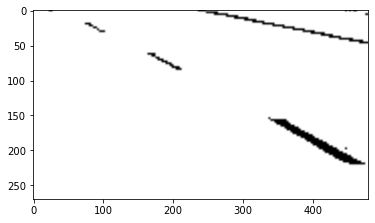

In [380]:
image = cv2.imread('dashboard-point-view.webp')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

undistorted_image = cv2.undistort(image,mtx,dist,None,mtx)
Com = Thresholding(undistorted_image)
image_f = np.dstack((Com,Com,Com))*255
warped_image, M_inv = perspective_transform(image_f)

plt.imshow(warped_image,'gray')

In [404]:
def lane_detection_histogram(warped_image): 
    histogram = np.sum(warped_image[warped_image.shape[0]//2:,:],axis = 0)

    #identify the peak values
    midpoint = np.int(histogram.shape[0]//2)
    left_lane =  np.argmax(histogram[:midpoint])
    right_lane = np.argmax(histogram[midpoint:])+midpoint

    #number of sliding windows
    windows = 9
    #width of the window
    margin = 100 #pixels 
    #minimum number of pixes to recenter the windows
    minpix = 50

    #height of the window based on number of windows
    window_height = np.int(warped_image.shape[0]/windows)

    #identify the pixels where it is non zeros
    nonzeros = warped_image.nonzero()
    nonzerosx = np.array(nonzeros[0])
    nonzerosy = np.array(nonzeros[1]) #nonzeros would represent white pixels

    #current position to be updated for each window
    leftx_current = left_lane # the start point
    rightx_current = right_lane

    #create empty variable to store left and right lane pixels
    left_lane_inds = []
    right_lane_inds = []

    #fit each window    #window boundaries
    for window in range(windows):
        win_y_low = warped_image.shape[0] - (window+1)*window_height
        win_y_high = warped_image.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin




        #identify the nonzero pixels
        left_inds = ((nonzerosy >= win_y_low) & (nonzerosy < win_y_high) & (nonzerosx >= win_xleft_low) & (nonzerosx < win_xleft_high)).nonzero()[0]
        right_inds = ((nonzerosy >= win_y_low) & (nonzerosy < win_y_high) & (nonzerosx >= win_xright_low) & (nonzerosx < win_xright_high)).nonzero()[0]

        #append the indices
        left_lane_inds.append(left_inds)
        right_lane_inds.append(right_inds)

        #recenter the pixels to the mean
        if len(left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerosx[left_inds]))

        if len(right_inds) > minpix:
            rightx_current = np.int(np.mean(nonzerosx[right_inds]))

    #concantenate the arrays of indices
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        pass        

    #extract the left and right pixels position 
    leftx = nonzerosx[left_lane_inds]
    lefty = nonzerosy[left_lane_inds]
    rightx = nonzerosx[right_lane_inds]
    righty = nonzerosy[right_lane_inds]
    return leftx,lefty,rightx,righty

def fit_ploy(warped_image,leftx,lefty,rightx,righty):
    #fit a polynomial line
    left_fit = np.polyfit(lefty, leftx, 2) #order = 2
    right_fit = np.polyfit(righty, rightx, 2)
    
    #Generate x and y values for plotting
    ploty = np.linspace(0,warped_image[0]-1, warped_image.shape[0])
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        print("the function failed to fit the line")
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
    return left_fit, right_fit, left_fitx, right_fitx, ploty           

def draw_poly_lines(warped_image, left_fitx, right_fitx, ploty):
    #create an image to draw
    out_iamge = np.dstack((warped_image, warped_image, warped_image))*255
    window_image = np.zeros_like(out_iamge)
    
    margin = 100
    #generate a polygon
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack[left_fitx + margin, ploty]))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2)) 
    
                                            
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack[right_fitx+margin, ploty]))])
    right_line_pts = np.hstack((right_line_window1,right_line_window2))
                                             
                                             
    #draw the line on the image
    cv2.fillPoly(window_image, np.int_([left_line_pts]),(100,100,0))                                         
    cv2.fillPoly(window_image, np.int_([right_line_pts]),(100,100,0))
    result = cv2.addweighted(out_iamge,1, window_image,0.3,0)                                         
                                            
    #plot the polynomial line 
    plt.plot(left_fitx, ploty, color='green')
    plt.plot(right_fitx, ploty, color='blue')  
    return result 

leftx,lefty,rightx,righty = lane_detection_histogram(warped_image)
left_fit, right_fit, left_fitx, right_fitx, ploty = fit_ploy(warped_image,leftx,lefty,rightx,righty)
print(left_fit)
out_iamge = draw_poly_lines(warped_image, left_fitx, right_fitx, ploty)
plt.imshow(out_iamge)

[-1.28786848e-03  1.91544393e-01  9.35355970e+01]


C:\Users\shubh\AppData\Local\Temp/ipykernel_13292/2951410006.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  midpoint = np.int(histogram.shape[0]//2)
C:\Users\shubh\AppData\Local\Temp/ipykernel_13292/2951410006.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

TypeError: 'function' object is not subscriptable